## PRE-PROCESSING

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

In [3]:
def loadimg(path):
    files=os.listdir(path)
    print(files)
    Exp=['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']
    i=0
    last=[]
    images=[]
    labels=[]
    for fle in files:
        idx=Exp.index(fle)
        label=idx
        total=path+'/'+fle
        files_exp= os.listdir(total)

        for fle_2 in files_exp:
            file_main=total+'/'+fle_2
            print(file_main+"   "+str(label))
            image= cv2.imread(file_main)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image= cv2.resize(image,(48,48))
            images.append(image)
            labels.append(label)
            i+=1
        last.append(i)
    images_f=np.array(images)
    images_f_2=images_f/255
    labels_f=np.array(labels)
    return images_f_2, images_f, labels_f, images, labels, Exp

In [25]:
path = './archive/CK+48'
images_f_2, images_f, labels_f, images, labels, Exp = loadimg(path)

['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']
./archive/CK+48/anger/S010_004_00000017.png   0
./archive/CK+48/anger/S010_004_00000018.png   0
./archive/CK+48/anger/S010_004_00000019.png   0
./archive/CK+48/anger/S011_004_00000019.png   0
./archive/CK+48/anger/S011_004_00000020.png   0
./archive/CK+48/anger/S011_004_00000021.png   0
./archive/CK+48/anger/S014_003_00000028.png   0
./archive/CK+48/anger/S014_003_00000029.png   0
./archive/CK+48/anger/S014_003_00000030.png   0
./archive/CK+48/anger/S022_005_00000030.png   0
./archive/CK+48/anger/S022_005_00000031.png   0
./archive/CK+48/anger/S022_005_00000032.png   0
./archive/CK+48/anger/S026_003_00000013.png   0
./archive/CK+48/anger/S026_003_00000014.png   0
./archive/CK+48/anger/S026_003_00000015.png   0
./archive/CK+48/anger/S028_001_00000022.png   0
./archive/CK+48/anger/S028_001_00000023.png   0
./archive/CK+48/anger/S028_001_00000024.png   0
./archive/CK+48/anger/S029_001_00000017.png   0
./archive/CK+48

./archive/CK+48/happy/S138_005_00000016.png   4
./archive/CK+48/sadness/S011_002_00000020.png   5
./archive/CK+48/sadness/S011_002_00000021.png   5
./archive/CK+48/sadness/S011_002_00000022.png   5
./archive/CK+48/sadness/S014_002_00000014.png   5
./archive/CK+48/sadness/S014_002_00000015.png   5
./archive/CK+48/sadness/S014_002_00000016.png   5
./archive/CK+48/sadness/S026_002_00000014.png   5
./archive/CK+48/sadness/S026_002_00000015.png   5
./archive/CK+48/sadness/S026_002_00000016.png   5
./archive/CK+48/sadness/S042_002_00000014.png   5
./archive/CK+48/sadness/S042_002_00000015.png   5
./archive/CK+48/sadness/S042_002_00000016.png   5
./archive/CK+48/sadness/S046_001_00000023.png   5
./archive/CK+48/sadness/S046_001_00000024.png   5
./archive/CK+48/sadness/S046_001_00000025.png   5
./archive/CK+48/sadness/S064_004_00000012.png   5
./archive/CK+48/sadness/S064_004_00000013.png   5
./archive/CK+48/sadness/S064_004_00000014.png   5
./archive/CK+48/sadness/S066_004_00000008.png   5
./

In [6]:
num_of_classes=7
labels_encoded=tf.keras.utils.to_categorical(labels_f,num_classes=num_of_classes)
X_train, X_test, Y_train, Y_test= train_test_split(images_f, labels_encoded,test_size=0.25)

## MODEL DEFINITION

In [7]:
def Convolution(input_tensor,filters):
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1),kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x= Activation('relu')(x)
    return x

def model(input_shape):
    inputs = Input((input_shape))
    conv_1= Convolution(inputs,32)
    maxp_1 = MaxPooling2D(pool_size = (2, 2)) (conv_1)
    conv_2 = Convolution(maxp_1,64)
    maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)
    conv_3 = Convolution(maxp_2,128)
    maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)
    conv_4 = Convolution(maxp_3,256)
    maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)
    flatten= Flatten() (maxp_4)
    dense_1= Dense(128,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    output= Dense(7,activation="sigmoid")(drop_1)
    
    model = Model(inputs=[inputs], outputs=[output])
    model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
    return model

In [8]:
Model=model(input_shape = (48,48,3))
Model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 32)        0         
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0     

In [9]:
fle_s='Emotion_detection.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75, monitor='loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]

## TRAINING MODEL

In [13]:
History=Model.fit(X_train,Y_train,batch_size=32,validation_data=(X_test,Y_test),epochs=1000,callbacks=[callback_list])

Epoch 1/1000
23/23 [==============================] - 3s 109ms/step - loss: 2.1714 - accuracy: 0.2298 - val_loss: 2.0585 - val_accuracy: 0.2073

Epoch 00001: loss improved from inf to 2.10353, saving model to Emotion_detection.h5
Epoch 2/1000
23/23 [==============================] - 2s 88ms/step - loss: 2.0206 - accuracy: 0.2485 - val_loss: 1.9809 - val_accuracy: 0.2439

Epoch 00002: loss improved from 2.10353 to 1.98848, saving model to Emotion_detection.h5
Epoch 3/1000
23/23 [==============================] - 2s 89ms/step - loss: 1.8711 - accuracy: 0.3302 - val_loss: 1.6414 - val_accuracy: 0.4919

Epoch 00003: loss improved from 1.98848 to 1.82346, saving model to Emotion_detection.h5
Epoch 4/1000
23/23 [==============================] - 2s 90ms/step - loss: 1.4910 - accuracy: 0.5160 - val_loss: 1.2792 - val_accuracy: 0.5854

Epoch 00004: loss improved from 1.82346 to 1.37241, saving model to Emotion_detection.h5
Epoch 5/1000
23/23 [==============================] - 2s 101ms/step - l

23/23 [==============================] - 2s 89ms/step - loss: 0.1425 - accuracy: 0.9876 - val_loss: 0.1473 - val_accuracy: 0.9878

Epoch 00038: loss improved from 0.14316 to 0.14101, saving model to Emotion_detection.h5
Epoch 39/1000
23/23 [==============================] - 2s 91ms/step - loss: 0.1305 - accuracy: 0.9969 - val_loss: 0.1352 - val_accuracy: 1.0000

Epoch 00039: loss improved from 0.14101 to 0.13041, saving model to Emotion_detection.h5
Epoch 40/1000
23/23 [==============================] - 2s 94ms/step - loss: 0.1278 - accuracy: 0.9964 - val_loss: 0.1473 - val_accuracy: 0.9837

Epoch 00040: loss improved from 0.13041 to 0.12472, saving model to Emotion_detection.h5
Epoch 41/1000
23/23 [==============================] - 2s 92ms/step - loss: 0.1327 - accuracy: 0.9944 - val_loss: 0.1643 - val_accuracy: 0.9797

Epoch 00041: loss did not improve from 0.12472
Epoch 42/1000
23/23 [==============================] - 2s 92ms/step - loss: 0.1361 - accuracy: 0.9929 - val_loss: 0.1621

23/23 [==============================] - 2s 90ms/step - loss: 0.0891 - accuracy: 0.9955 - val_loss: 0.1033 - val_accuracy: 0.9797

Epoch 00120: loss did not improve from 0.08066
Epoch 121/1000
23/23 [==============================] - 2s 91ms/step - loss: 0.0889 - accuracy: 0.9937 - val_loss: 0.2103 - val_accuracy: 0.9634

Epoch 00121: loss did not improve from 0.08066
Epoch 122/1000
23/23 [==============================] - 2s 92ms/step - loss: 0.1581 - accuracy: 0.9830 - val_loss: 0.1221 - val_accuracy: 1.0000

Epoch 00122: loss did not improve from 0.08066
Epoch 123/1000
23/23 [==============================] - 2s 93ms/step - loss: 0.1528 - accuracy: 0.9715 - val_loss: 0.1075 - val_accuracy: 0.9959

Epoch 00123: loss did not improve from 0.08066
Epoch 124/1000
23/23 [==============================] - 2s 92ms/step - loss: 0.0993 - accuracy: 0.9937 - val_loss: 0.1030 - val_accuracy: 0.9878

Epoch 00124: loss did not improve from 0.08066
Epoch 125/1000
23/23 [============================


Epoch 00202: loss did not improve from 0.05839
Epoch 203/1000
23/23 [==============================] - 2s 87ms/step - loss: 0.0918 - accuracy: 0.9942 - val_loss: 0.0714 - val_accuracy: 1.0000

Epoch 00203: loss did not improve from 0.05839
Epoch 204/1000
23/23 [==============================] - 2s 87ms/step - loss: 0.0738 - accuracy: 0.9980 - val_loss: 0.0721 - val_accuracy: 1.0000

Epoch 00204: loss did not improve from 0.05839
Epoch 205/1000
23/23 [==============================] - 2s 87ms/step - loss: 0.0733 - accuracy: 0.9990 - val_loss: 0.0770 - val_accuracy: 0.9959

Epoch 00205: loss did not improve from 0.05839
Epoch 206/1000
23/23 [==============================] - 2s 87ms/step - loss: 0.0763 - accuracy: 0.9971 - val_loss: 0.0767 - val_accuracy: 0.9959

Epoch 00206: loss did not improve from 0.05839
Epoch 207/1000
23/23 [==============================] - 2s 87ms/step - loss: 0.0867 - accuracy: 0.9975 - val_loss: 0.0698 - val_accuracy: 1.0000

Epoch 00207: loss did not improve 

23/23 [==============================] - 2s 87ms/step - loss: 0.0413 - accuracy: 1.0000 - val_loss: 0.0487 - val_accuracy: 0.9959

Epoch 00243: loss improved from 0.04201 to 0.04189, saving model to Emotion_detection.h5
Epoch 244/1000
23/23 [==============================] - 2s 88ms/step - loss: 0.0438 - accuracy: 0.9989 - val_loss: 0.1387 - val_accuracy: 0.9715

Epoch 00244: loss did not improve from 0.04189
Epoch 245/1000
23/23 [==============================] - 2s 87ms/step - loss: 0.0794 - accuracy: 0.9799 - val_loss: 0.0614 - val_accuracy: 1.0000

Epoch 00245: loss did not improve from 0.04189
Epoch 246/1000
23/23 [==============================] - 2s 87ms/step - loss: 0.0708 - accuracy: 0.9907 - val_loss: 0.0838 - val_accuracy: 0.9919

Epoch 00246: loss did not improve from 0.04189
Epoch 247/1000
23/23 [==============================] - 2s 87ms/step - loss: 0.1459 - accuracy: 0.9714 - val_loss: 0.0965 - val_accuracy: 0.9919

Epoch 00247: loss did not improve from 0.04189
Epoch 24

## LOAD TRAINED MODEL

In [10]:
import numpy as np
Model = tf.keras.models.load_model(fle_s)
print(Model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 32)        0         
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0     

## EVALUATION

In [11]:
score = Model.evaluate(X_train, Y_train)

23/23 [==============================] - 1s 13ms/step - loss: 0.0385 - accuracy: 1.0000


In [12]:
score = Model.evaluate(X_test, Y_test)

8/8 [==============================] - 0s 12ms/step - loss: 0.0385 - accuracy: 1.0000


In [13]:
Pred=Model.predict(X_test)

In [24]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    print("Label actual:  " + Exp[labels[ind]]  )
    pred_1=Model.predict(np.array([image_test]))
    pred_class=Exp[int(np.argmax(pred_1))]
    print("Predicted Label: "+ pred_class)

Label actual:  anger
Predicted Label: anger


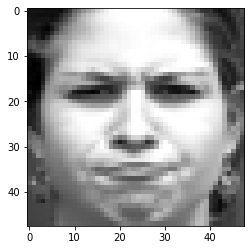

In [29]:
test_image(78,images_f,images_f_2,Model)

Label actual:  anger
Predicted Label: anger


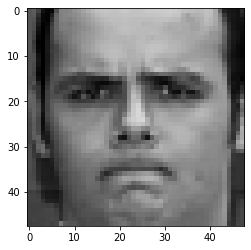

In [18]:
test_image(36,images_f,images_f,Model)

Label actual:  disgust
Predicted Label: disgust


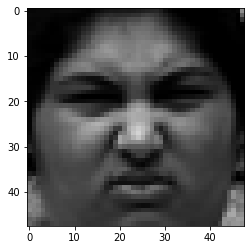

In [19]:
test_image(189,images_f,images_f_2,Model)

Label actual:  happy
Predicted Label: happy


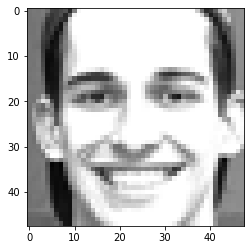

In [20]:
test_image(555,images_f,images_f_2,Model)

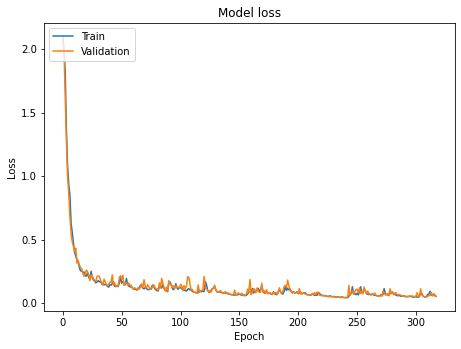

In [22]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25, wspace=0.35)

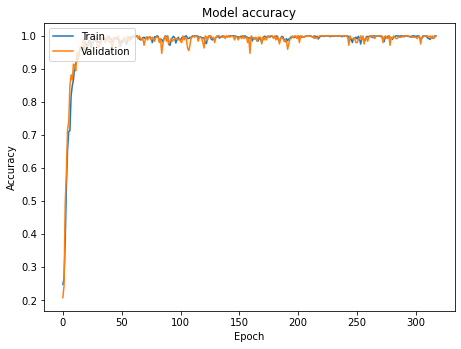

In [23]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25, wspace=0.35)

In [25]:
i=0
Y_test_l=[]
Pred_l=[]
while(i<len(Pred)):
  Y_test_l.append(int(np.argmax(Y_test[i])))
  Pred_l.append(int(np.argmax(Pred[i])))
  i+=1
report=classification_report(Y_test_l, Pred_l)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.94      1.00      0.97        15
           2       1.00      1.00      1.00        46
           3       1.00      0.96      0.98        28
           4       1.00      1.00      1.00        51
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00        60

    accuracy                           1.00       246
   macro avg       0.99      0.99      0.99       246
weighted avg       1.00      1.00      1.00       246



<AxesSubplot:>

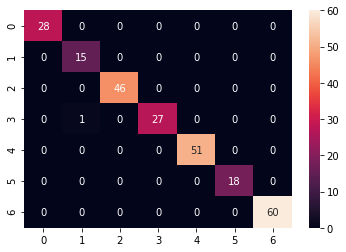

In [26]:
results = confusion_matrix(Y_test_l, Pred_l)
import seaborn as sns
sns.heatmap(results, annot=True)

## TEST OWN PICTURES

In [21]:
def testown(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img= cv2.resize(img,(48,48))
    plt.imshow(img)
    img=img/255
    pred=Model.predict(np.array([img]))
    pred_class=Exp[int(np.argmax(pred))]
    print("Predicted Label: "+ pred_class)

Predicted Label: happy


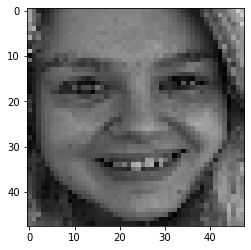

In [30]:
img = cv2.imread('./1.png')
testown(img)

Predicted Label: sadness


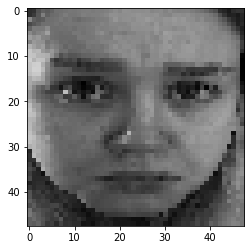

In [31]:
img = cv2.imread('./2.png')
testown(img)

Predicted Label: surprise


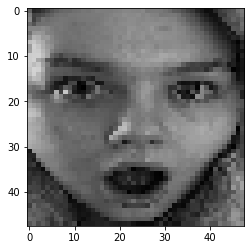

In [32]:
img = cv2.imread('./3.png')
testown(img)

Predicted Label: fear


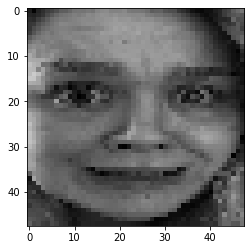

In [33]:
img = cv2.imread('./4.png')
testown(img)

Predicted Label: disgust


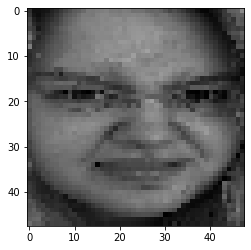

In [34]:
img = cv2.imread('./5.png')
testown(img)

Predicted Label: contempt


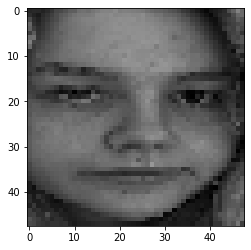

In [35]:
img = cv2.imread('./6.png')
testown(img)

Predicted Label: disgust


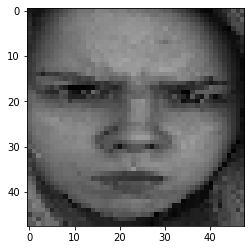

In [36]:
img = cv2.imread('./7.png')
testown(img)

Predicted Label: contempt


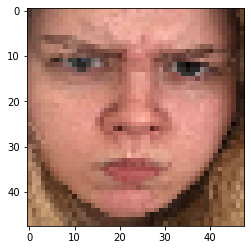

In [24]:
img = cv2.imread('./tang.jpg')
testown(img)

Predicted Label: surprise


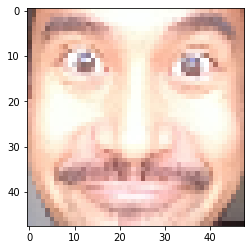

In [25]:
img = cv2.imread('./Chappy.png')
testown(img)

Predicted Label: contempt


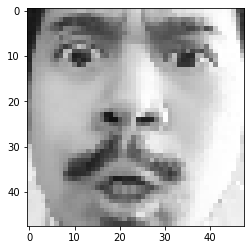

In [26]:
img = cv2.imread('./Canger.png')
testown(img)

Predicted Label: happy


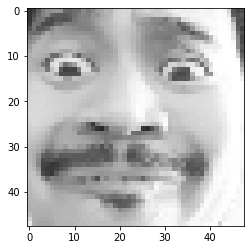

In [27]:
img = cv2.imread('./Cfear.png')
testown(img)